In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimSun']  # 用于中文显示
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../')
sys.path.append('../../')

from Pricing.rBergomi.rBergomi_utils import *
from calibrate_utils import *


xx, yy, strikes, maturities = data_read(r"../../Data/rBergomiTrainSet.txt.gz")

# 训练集的 Upper and Lower Bounds
upper_bound = np.array([0.16,4,-0.1,0.5])
lower_bound = np.array([0.01,0.3,-0.95,0.025])


x_train_transform, y_train_transform, x_test_transform, y_test_transform = get_transform_train_test_data(xx, yy, upper_bound, lower_bound, 0.15)

网格数据形状：(40000, 92)
参数形状：(40000, 4)
隐含波动率曲面形状：(40000, 88)
参数上界: [ 0.16      4.       -0.100011  0.499998]
参数下界: [ 0.0100133  0.300028  -0.949934   0.0250066]


In [3]:
methods=["L-BFGS-B ","SLSQP","BFGS"]

## GLU

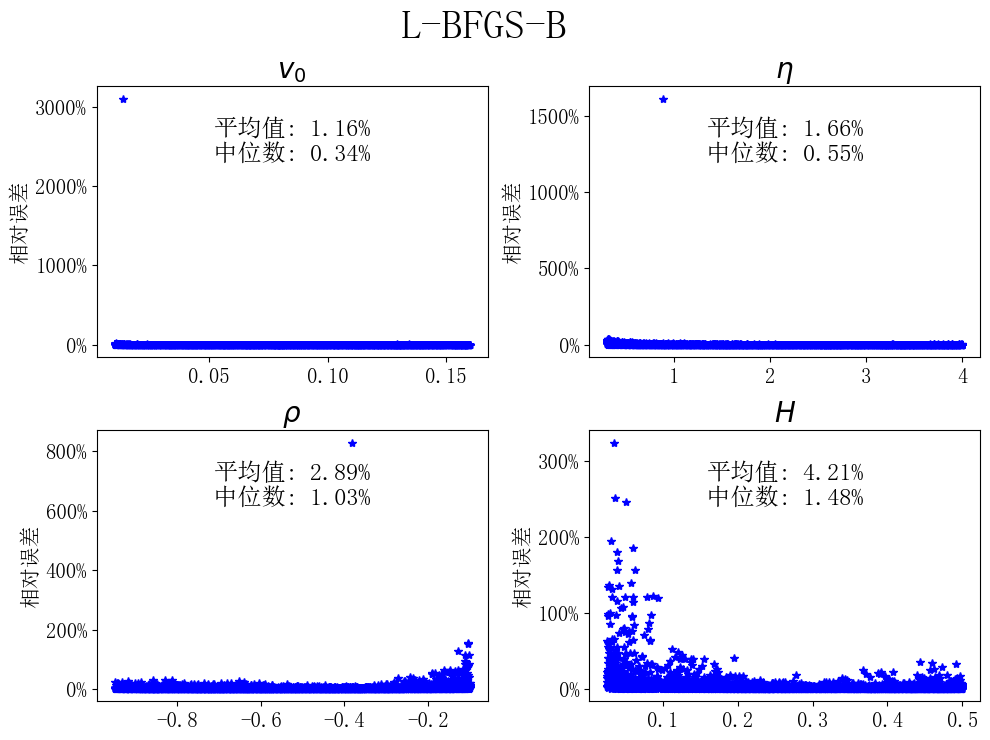

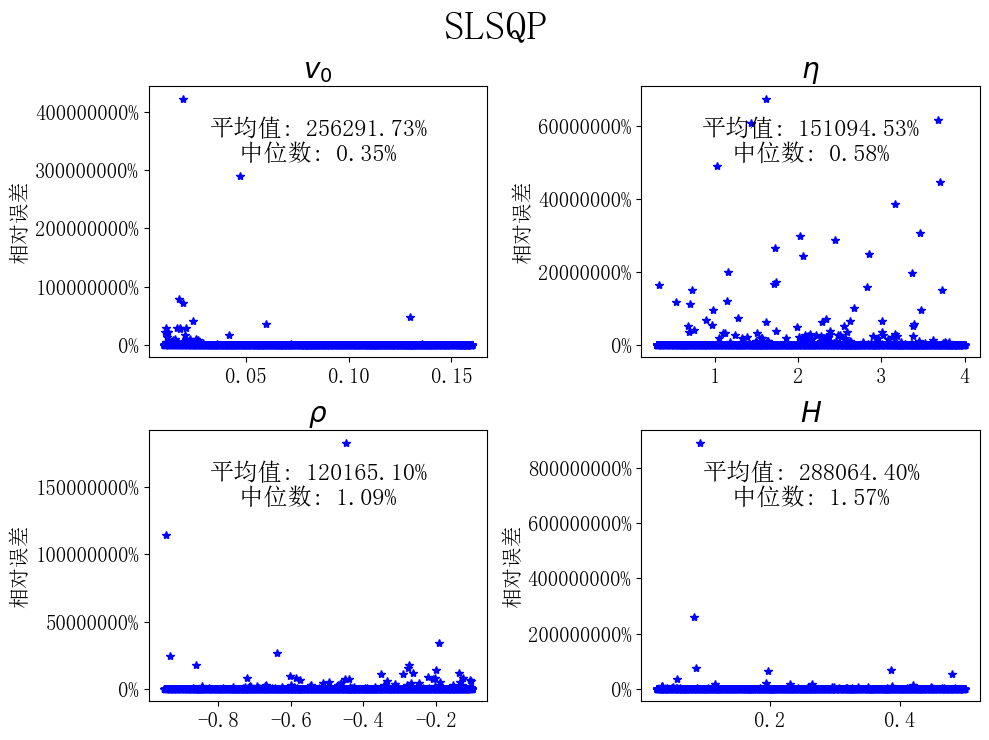

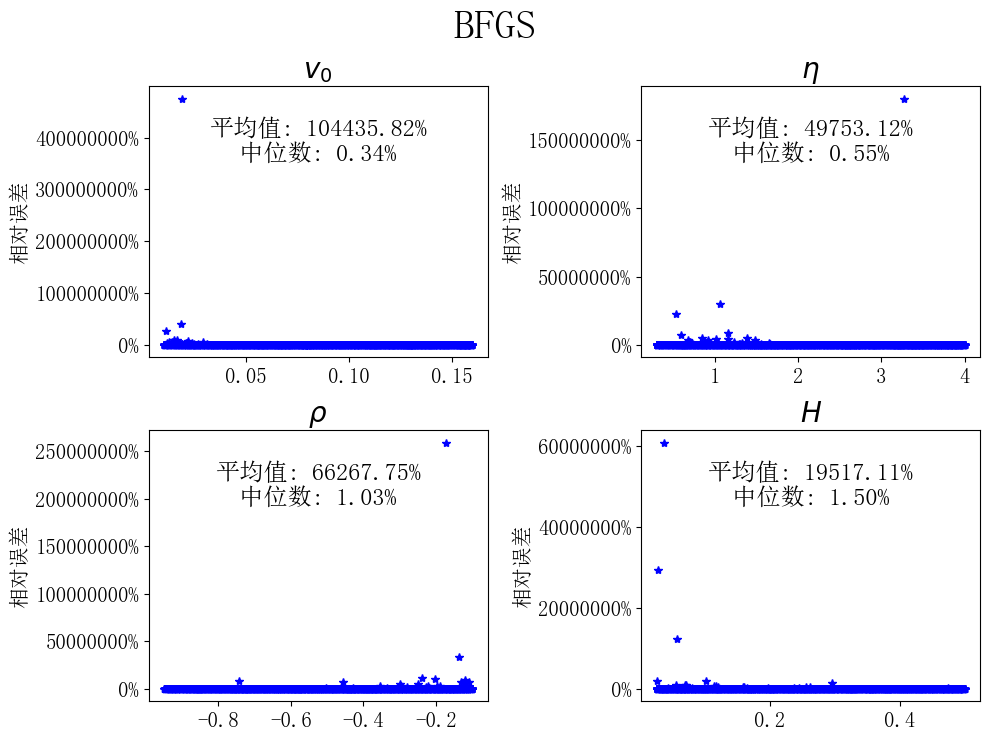

In [4]:
Approx_scipy, Timing_scipy = [], []

for i in range(3):
    Approx_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_GLU_calibrate_scipy_quasi_newton_{methods[i]}.txt")
    )
    Timing_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_GLU_calibrate_scipy_quasi_newton_{methods[i]}_time.txt")
    )

Approx_scipy = np.array(Approx_scipy)
Timing_scipy = np.array(Timing_scipy)


x_test = params_inv_scaler(x_test_transform, upper_bound, lower_bound)

for mtd in range(3):
    LMParameters = [Approx_scipy[mtd][i] for i in range(6000)]
    LMParameters = np.array(LMParameters)

    titles=["$v_0$","$\\eta$","$\\rho$","$H$"]
    average=np.zeros([4,6000])
    fig=plt.figure(figsize=(10,7))
    for u in range(4):
        ax=plt.subplot(2,2,u+1)
        x=x_test[:6000,u]
        plt.plot(x,100*np.abs(LMParameters[:6000,u]-x)/np.abs(x),'b*')
        average[u,:]=np.abs(LMParameters[:6000,u]-x)/np.abs(x)
        
        plt.title(titles[u],fontsize=20)
        plt.ylabel('相对误差',fontsize=15)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.tick_params(axis='both', which='minor', labelsize=15)
        plt.text(0.5, 0.8, '平均值: %1.2f%%\n 中位数: %1.2f%% '%(np.mean(100*average[u,:]),np.quantile(100*average[u,:],0.5)), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=17.5)
    plt.tight_layout()
    plt.suptitle(f"{methods[mtd]}", fontsize=30, y=1.05)
    plt.savefig(f"pic/glu_{methods[mtd]}.pdf", dpi=300, bbox_inches='tight')
    plt.show()

## NN

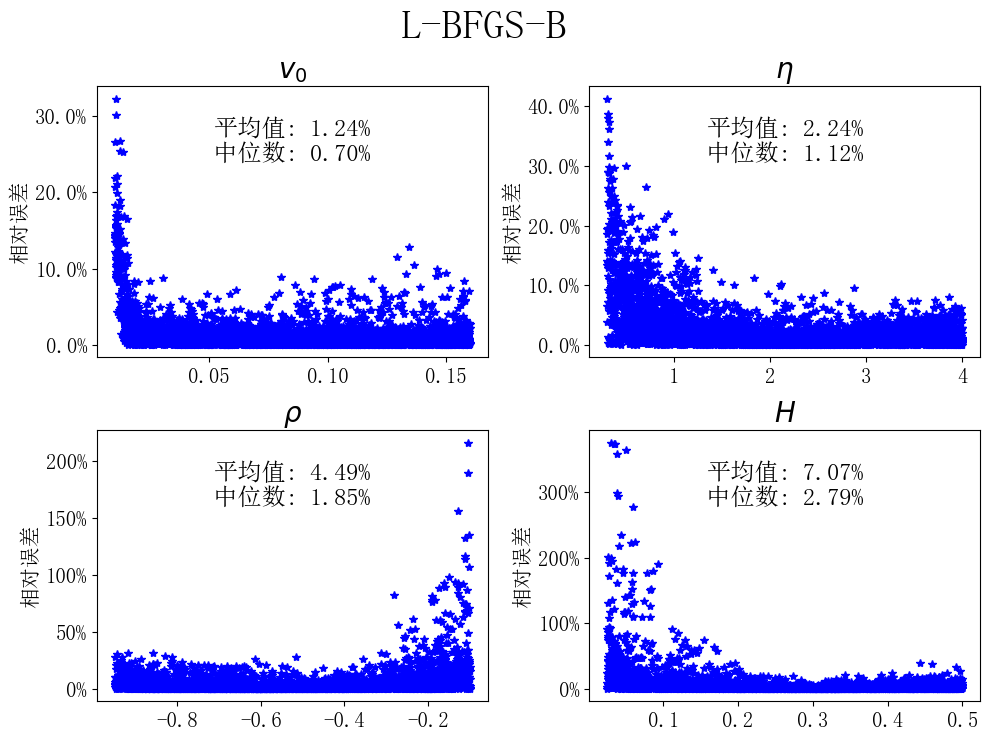

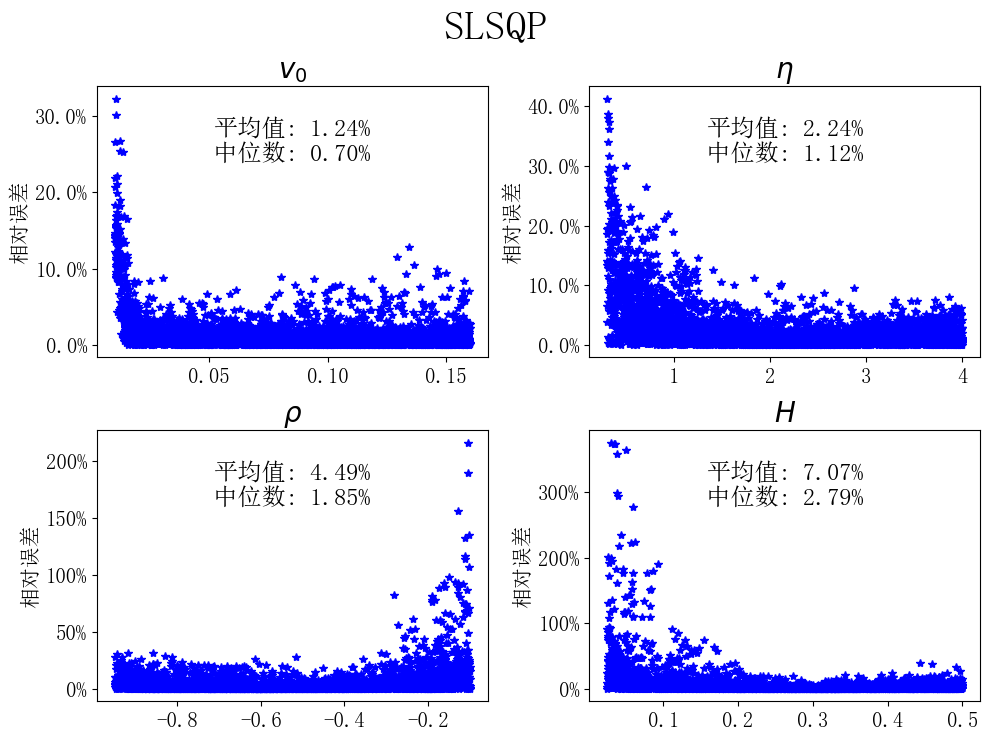

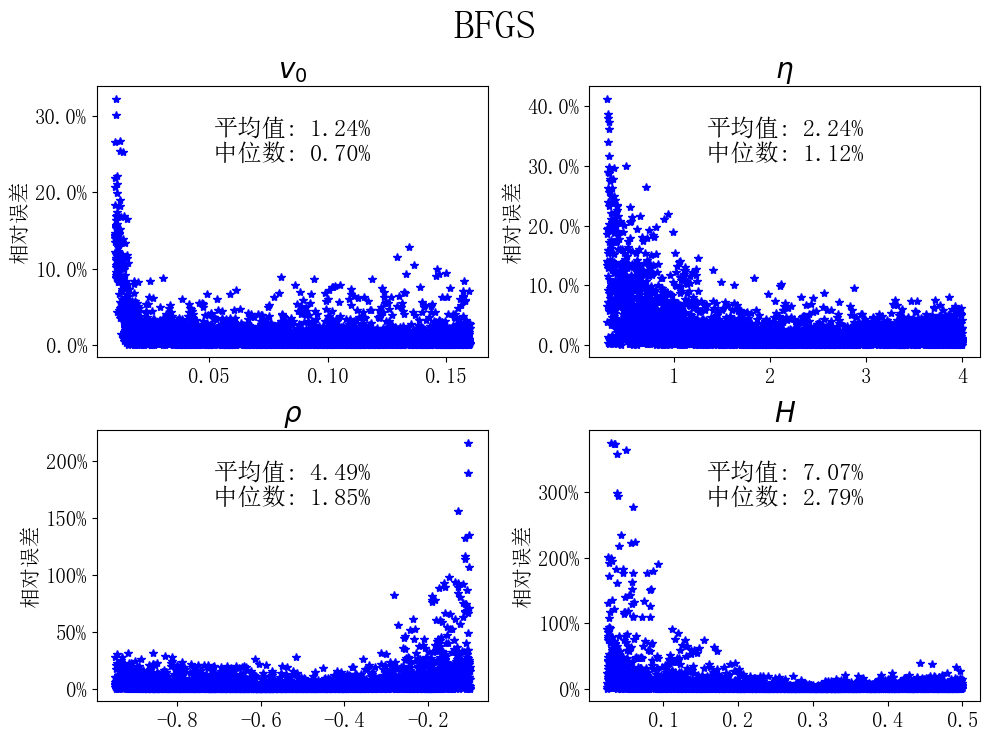

In [5]:
Approx_scipy, Timing_scipy = [], []

for i in range(3):
    Approx_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_NN_calibrate_scipy_quasi_newton_{methods[i]}.txt")
    )
    Timing_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_NN_calibrate_scipy_quasi_newton_{methods[i]}_time.txt")
    )

Approx_scipy = np.array(Approx_scipy)
Timing_scipy = np.array(Timing_scipy)


x_test = params_inv_scaler(x_test_transform, upper_bound, lower_bound)

for mtd in range(3):
    LMParameters = [Approx_scipy[mtd][i] for i in range(6000)]
    LMParameters = np.array(LMParameters)

    titles=["$v_0$","$\\eta$","$\\rho$","$H$"]
    average=np.zeros([4,6000])
    fig=plt.figure(figsize=(10,7))
    for u in range(4):
        ax=plt.subplot(2,2,u+1)
        x=x_test[:6000,u]
        plt.plot(x,100*np.abs(LMParameters[:6000,u]-x)/np.abs(x),'b*')
        average[u,:]=np.abs(LMParameters[:6000,u]-x)/np.abs(x)
        
        plt.title(titles[u],fontsize=20)
        plt.ylabel('相对误差',fontsize=15)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.tick_params(axis='both', which='minor', labelsize=15)
        plt.text(0.5, 0.8, '平均值: %1.2f%%\n 中位数: %1.2f%% '%(np.mean(100*average[u,:]),np.quantile(100*average[u,:],0.5)), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=17.5)
    plt.tight_layout()
    plt.suptitle(f"{methods[mtd]}", fontsize=30, y=1.05)
    plt.savefig(f"pic/nn_{methods[mtd]}.pdf", dpi=300, bbox_inches='tight')
    plt.show()

## up

In [39]:
Approx_scipy, Timing_scipy = [], []

for i in range(3):
    Approx_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_SwiGLU_calibrate_scipy_quasi_newton_{methods[i]}.txt")
    )
    Timing_scipy.append( 
        np.loadtxt(f"../../Results/Calibration/rBergomi_SwiGLU_calibrate_scipy_quasi_newton_{methods[i]}_time.txt")
    )

Approx_scipy = np.array(Approx_scipy)
Timing_scipy = np.array(Timing_scipy)

In [40]:
Approx_scipy.shape

(3, 6000, 4)

In [41]:
Approx_scipy[0].shape

(6000, 4)

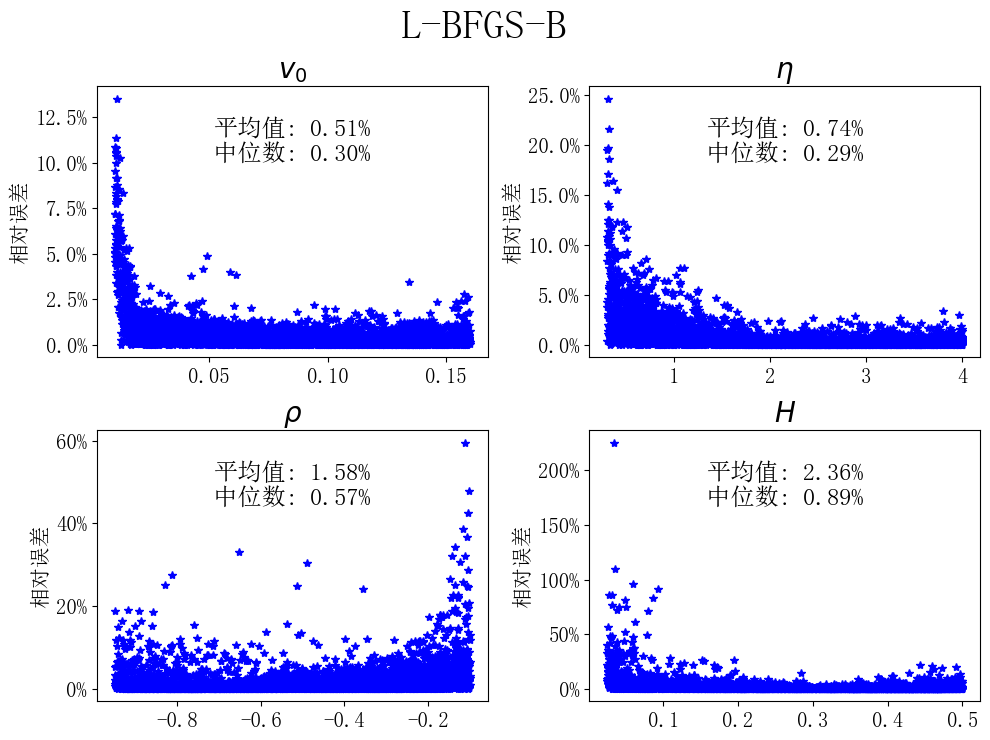

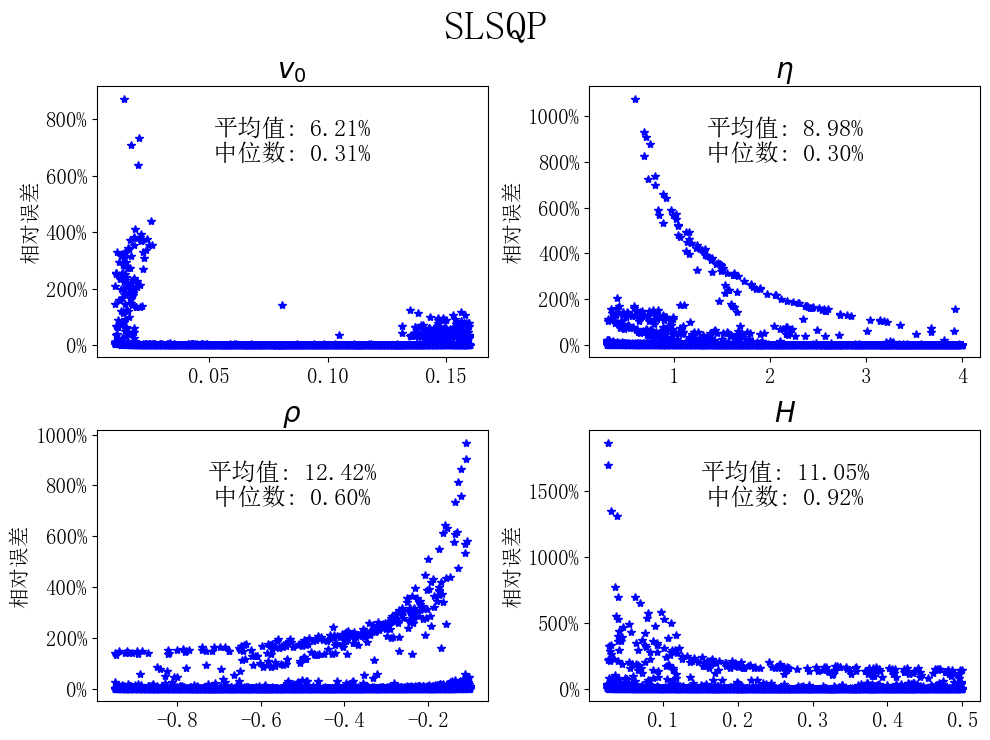

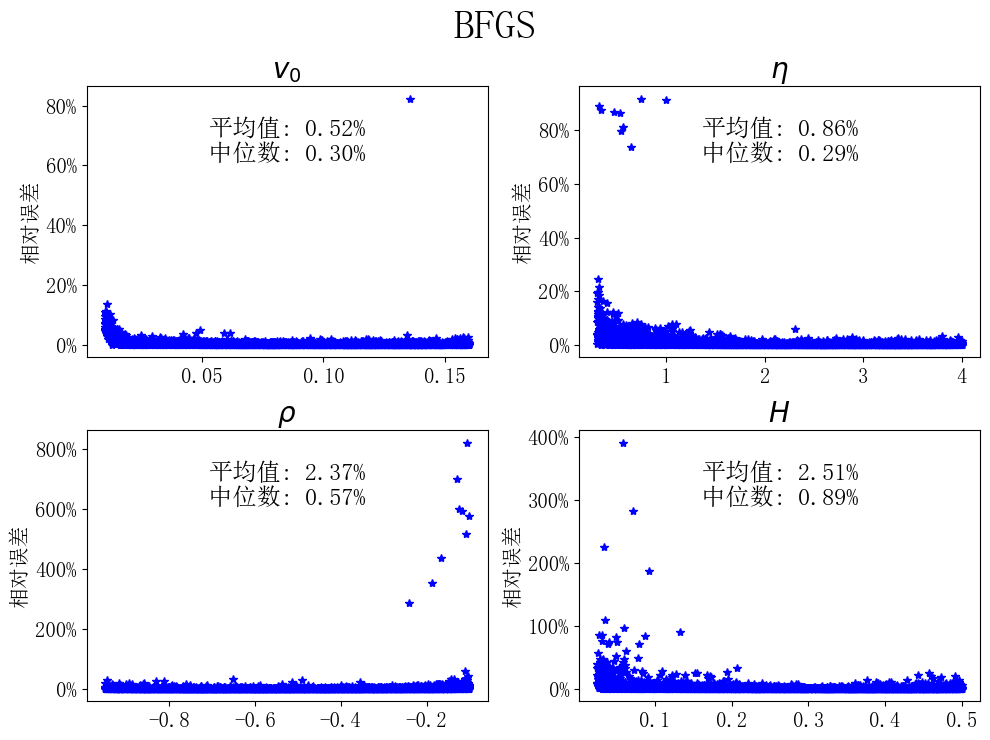

In [43]:
x_test = params_inv_scaler(x_test_transform, upper_bound, lower_bound)

for mtd in range(3):
    LMParameters = [Approx_scipy[mtd][i] for i in range(6000)]
    LMParameters = np.array(LMParameters)

    titles=["$v_0$","$\\eta$","$\\rho$","$H$"]
    average=np.zeros([4,6000])
    fig=plt.figure(figsize=(10,7))
    for u in range(4):
        ax=plt.subplot(2,2,u+1)
        x=x_test[:6000,u]
        plt.plot(x,100*np.abs(LMParameters[:6000,u]-x)/np.abs(x),'b*')
        average[u,:]=np.abs(LMParameters[:6000,u]-x)/np.abs(x)
        
        plt.title(titles[u],fontsize=20)
        plt.ylabel('相对误差',fontsize=15)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.tick_params(axis='both', which='minor', labelsize=15)
        plt.text(0.5, 0.8, '平均值: %1.2f%%\n 中位数: %1.2f%% '%(np.mean(100*average[u,:]),np.quantile(100*average[u,:],0.5)), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=17.5)
    plt.tight_layout()
    plt.suptitle(f"{methods[mtd]}", fontsize=30, y=1.05)
    plt.savefig(f"pic/up_nn_{methods[mtd]}.pdf", dpi=300, bbox_inches='tight')
    plt.show()